<a href="https://colab.research.google.com/github/aruaru0/pytorch-classifier-sample/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm
!pip install icrawler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00


In [ ]:
import torch
import timm
import numpy as np
from icrawler.builtin import GoogleImageCrawler

# 画像を取得する

In [ ]:
google_crawler = GoogleImageCrawler(
    storage={'root_dir': 'images/dog'})
google_crawler.crawl(keyword='dog', max_num=100)

ERROR:downloader:Response status code 400, file https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0\u003d/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg
ERROR:downloader:Response status code 404, file https://www.scotsman.com/webimg/b25lY21zOjdlNGNiYTJjLWRhMTAtNGJhYS04N2U2LWRiM2U1MjQ0ZDkzYjoxM2U0Y2FkMi1jYzc0LTQ0ZTYtYjc5My02ZDg5Y2MwOGMzZjY\u003d.jpg
ERROR:downloader:Response status code 404, file https://www.scotsman.com/webimg/b25lY21zOjdjODA4MjQzLWMyNDktNDkxOS1hYzBlLTI0NDg2YmVhMjliZTpkMmQ1OGE0ZS0xNDAzLTQxZTAtYTBlMi1lY2I2ZDVhOTdhMDA\u003d.jpg
ERROR:downloader:Response status code 400, file https://www.dailypaws.com/thmb/S6Iaa-eEk-2mUcuox_BV1oWbyVc\u003d/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/neapolitan-mastiff-with-woman-on-leash-2-77685259-2000-81fba6fbcb8244d2adb24e31cc082c78.jpg
ERROR:downloader:Exception caught when downloading file https://www.nylabone.com/-/media/project/oneweb/nylabone/im

In [ ]:
google_crawler = GoogleImageCrawler(
    storage={'root_dir': 'images/cat'})
google_crawler.crawl(keyword='cat', max_num=100)

ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg
ERROR:downloader:Response status code 400, file https://www.thesprucepets.com/thmb/uQnGtOt9VQiML2oG2YzAmPErrHo\u003d/5441x0/filters:no_upscale():strip_icc()/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg
ERROR:downloader:Response status code 401, file https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg
ERROR:downloader:Response status code 400, file https://th-thumbnailer.cdn-si-edu.com/bZAar59Bdm95b057iESytYmmAjI\u003d/1400x1050/filters:focal(594x274:595x275)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/95/db/95db799b-fddf-4fde-91f3-77024442b92d/egypt_kitty_social.jpg
ERROR:downloader:Response status code 400, file https://cdn.theatlantic.com/thumbor/

In [ ]:
!mkdir images/train images/valid images/train/cat images/train/dog images/valid/cat images/valid/dog
!mv images/cat/00000?.jpg images/valid/cat
!mv images/dog/00000?.jpg images/valid/dog
!mv images/cat images/train
!mv images/dog images/train

In [ ]:
!ls -R images

images:
cat  dog

images/cat:
000001.jpg  000014.jpg	000027.jpg  000040.jpg	000053.jpg  000066.jpg
000002.jpg  000015.jpg	000028.jpg  000041.jpg	000054.jpg  000067.jpg
000003.jpg  000016.png	000029.jpg  000042.jpg	000055.jpg  000068.jpg
000004.jpg  000017.jpg	000030.jpg  000043.jpg	000056.jpg  000069.jpg
000005.jpg  000018.jpg	000031.jpg  000044.jpg	000057.jpg  000070.jpg
000006.jpg  000019.jpg	000032.jpg  000045.jpg	000058.jpg  000071.jpg
000007.jpg  000020.jpg	000033.jpg  000046.jpg	000059.jpg  000072.jpg
000008.jpg  000021.jpg	000034.jpg  000047.jpg	000060.jpg  000073.jpg
000009.jpg  000022.jpg	000035.jpg  000048.jpg	000061.jpg  000074.png
000010.png  000023.jpg	000036.jpg  000049.jpg	000062.jpg  000075.png
000011.jpg  000024.jpg	000037.jpg  000050.jpg	000063.jpg
000012.jpg  000025.jpg	000038.jpg  000051.jpg	000064.jpg
000013.jpg  000026.jpg	000039.jpg  000052.jpg	000065.png

images/dog:
000001.jpg  000013.jpg	000025.jpg  000037.jpg	000049.png  000061.jpg
000002.jpg  000014.jpg	0000

# データローダ・データセットの作成

In [ ]:
from timm.data import create_dataset, create_loader
from timm.data.transforms_factory import create_transform

In [ ]:
dataset_train = create_dataset('train', root="./images/train", class_map={'dog':0, 'cat':1})#, transform=create_transform(224))
dataset_valid = create_dataset('valid', root="./images/valid", class_map={'dog':0, 'cat':1})

1

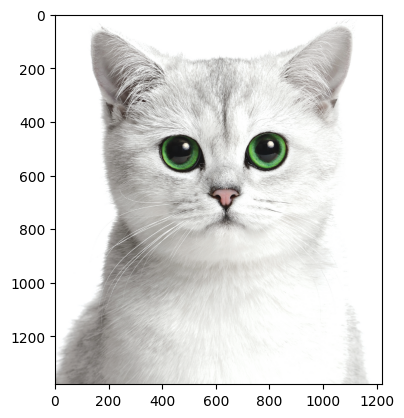

In [ ]:
import matplotlib.pyplot as plt
img, label = dataset_train[0]
plt.imshow(img)
label

In [ ]:
dataloader_train = create_loader(dataset_train, input_size=(3,224,224), batch_size=16, is_training=True)
dataloader_valid = create_loader(dataset_valid, input_size=(3,224,224), batch_size=8, is_training=False)

In [ ]:
# 確認
for X, y in dataloader_valid:
  print(y)

tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0], device='cuda:0')


# モデル作成

In [ ]:
model = timm.create_model('resnet18', pretrained=True, num_classes=2)

# パラメータ設定

In [ ]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 学習

In [ ]:
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_fn = torch.nn.CrossEntropyLoss()

model.to(device)

for epoch in range(num_epochs):
    print("EPOCH", epoch)
    model.train()
    train_loss = 0
    for batch in tqdm(dataloader_train):
        inputs, targets = batch
        outputs = model(inputs.to(device))
        loss = loss_fn(outputs, targets)
        train_loss += float(loss.detach().cpu())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    model.eval()
    eval_loss = 0
    for batch in tqdm(dataloader_valid):
        inputs, targets = batch
        with torch.no_grad() :
          outputs = model(inputs.to(device))
        loss = loss_fn(outputs, targets)
        eval_loss += float(loss.detach().cpu())
    print("train_loss = ", train_loss, "eval_loss = ", eval_loss)


100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


train_loss =  1.1167783811688423 eval_loss =  0.4039292838424444


100%|██████████| 3/3 [00:01<00:00,  1.83it/s]


train_loss =  0.5723501332104206 eval_loss =  0.41185062751173973


100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


train_loss =  0.6922728978097439 eval_loss =  0.7120563965290785


100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


train_loss =  0.7401753179728985 eval_loss =  0.92754543479532


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


train_loss =  0.9908472895622253 eval_loss =  0.4353695623940439


100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


train_loss =  0.6257322318851948 eval_loss =  0.24966044233588036


100%|██████████| 3/3 [00:01<00:00,  1.82it/s]


train_loss =  0.418641384691 eval_loss =  0.18047677652793936


100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


train_loss =  0.34284356608986855 eval_loss =  0.13574806920951232


100%|██████████| 3/3 [00:01<00:00,  1.84it/s]


train_loss =  0.3922074921429157 eval_loss =  0.359973566402914


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

train_loss =  1.2926445379853249 eval_loss =  0.6829960844479501


# 評価

In [ ]:
model.eval()
y_pred = []
y_gt = []
for batch in tqdm(dataloader_valid):
    inputs, targets = batch
    with torch.no_grad() :
      outputs = model(inputs.to(device))
    y_gt += targets.tolist()
    y_pred += outputs.argmax(axis=1).tolist()


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


In [ ]:
y_pred, y_gt

([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 指標の計算

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

In [ ]:
confusion_matrix(y_gt, y_pred)

array([[8, 1],
       [0, 8]])

In [ ]:
acc, recall, fs = accuracy_score(y_gt, y_pred), recall_score(y_gt, y_pred), f1_score(y_gt, y_pred)
print(f"acc={acc}, recall={recall}. f-score={fs}")

acc=0.9411764705882353, recall=1.0. f-score=0.9411764705882353


# ミス画像の表示

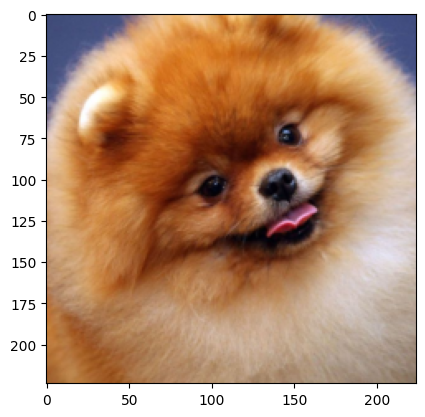

In [64]:
for idx, (x, y) in enumerate(zip(y_pred, y_gt)):
  if x != y :
    img, label = dataset_valid[idx]
    plt.imshow(img.transpose(1,2,0))
    plt.show()